# Рівномірний розподіл. IID процеси. Середнє,
# дисперсія, коефіцієнти ексцесу та асиметрії. Характеристична
# функція. Центральна гранична теорема

## Task 1

INFO:root:Mean: 9.391603740117096
INFO:root:Variance: 13.27250363584044
INFO:root:Standard Deviation: 3.6431447453869357
INFO:root:Skewness: 0.006526066548012055
INFO:root:Kurtosis: -1.1967231313880309


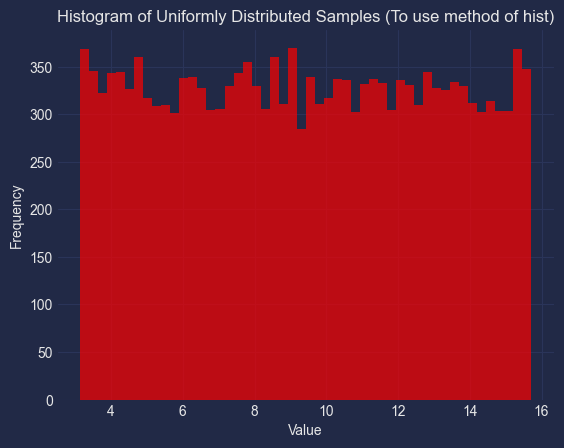

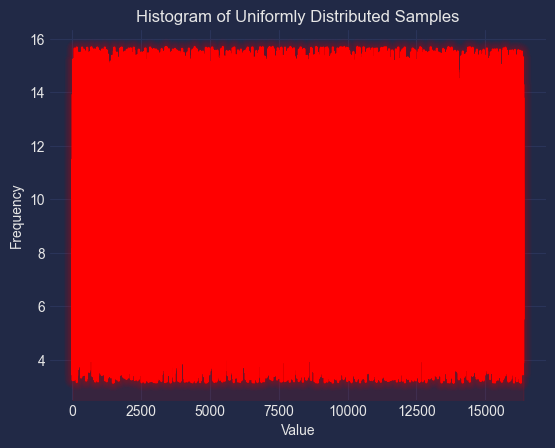

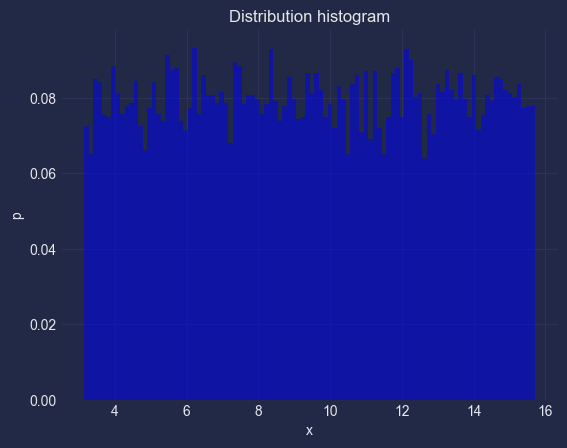

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import logging
import mplcyberpunk

plt.style.use("cyberpunk")

# Configure logging
logging.basicConfig(level=logging.INFO)

def generate_uniform_distribution(a, b, N):
    return np.random.uniform(a, b, N)

def calculate_statistics(samples):
    mean = np.mean(samples)
    variance = np.var(samples)
    std_dev = np.std(samples)
    skewness = ((np.mean((samples - mean) ** 3)) / std_dev**3)
    kurtosis = ((np.mean((samples - mean) ** 4)) / std_dev**4) - 3
    return mean, variance, std_dev, skewness, kurtosis

def plot_histogram(samples):
    plt.figure(1)
    plt.hist(samples, bins=50, alpha=0.7, color='red')
    plt.title('Histogram of Uniformly Distributed Samples (To use method of hist)')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    mplcyberpunk.add_glow_effects()
    plt.show()
    
    plt.figure(2)
    plt.plot(samples, color='red')
    plt.title('Histogram of Uniformly Distributed Samples')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    mplcyberpunk.add_glow_effects()
    plt.show()

def plot_distribution(proc, inter):
    plt.figure(3)
    p, x, patches = plt.hist(proc, 100, inter, color='BLUE', density=True, alpha=0.5)
    plt.grid(True)
    plt.xlabel('x')
    plt.ylabel('p')
    plt.title('Distribution histogram')
    mplcyberpunk.add_glow_effects()
    plt.show()

# Set the parameters for the uniform distribution
# Parametrs: [np.pi, 7*np.pi]
a = np.pi    # start of the interval (pi)
b = 5 * np.pi # end of the interval (5*pi)
N = 2**14    # number of samples

# Generate the uniform distribution
samples = generate_uniform_distribution(a, b, N)

# Calculate and log the descriptive statistics
mean, variance, std_dev, skewness, kurtosis = calculate_statistics(samples)
logging.info(f"Mean: {mean}")
logging.info(f"Variance: {variance}")
logging.info(f"Standard Deviation: {std_dev}")
logging.info(f"Skewness: {skewness}")
logging.info(f"Kurtosis: {kurtosis}")

# Plot the distribution
inter = [a, b]  # You need to define inter before using it
proc = inter[0] + np.random.rand(N)*(inter[1]-inter[0])   # You need to define proc before using it
# Plot the histogram of the samples
plot_histogram(samples)

plot_distribution(proc, inter)


INFO:root:Mean: [4.320174540741139, 6.669405716894475, 9.036726840857948, 11.39887077966231, 13.74521279887546, 16.093916189763963, 18.453274515331323, 20.804444259705352]
INFO:root:Variance: [0.4624648858725492, 0.45682148141808276, 0.463060081340161, 0.4595300253531784, 0.4601991093874197, 0.463786853591643, 0.4616322126697563, 0.46052928375870233]
INFO:root:mean_o: 100.52202564183196
INFO:root:emp variance: 3.6880239333914924
INFO:root:Moments: [4.90193169e-01 1.02090474e+01 2.12845215e+02 4.44223519e+03]
INFO:root:Central Moments: [4.78643265e-01 9.73413043e+00 1.98182588e+02 4.03938326e+03]
INFO:root:Cumulants: [4.78643265e-01 9.73413043e+00 1.98182588e+02 3.75512338e+03]
INFO:root:Normed Cumulants: [0.04688422 0.09339566 0.18625581 0.34568722]


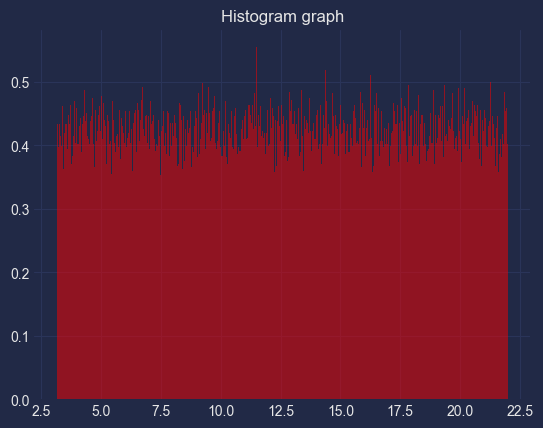

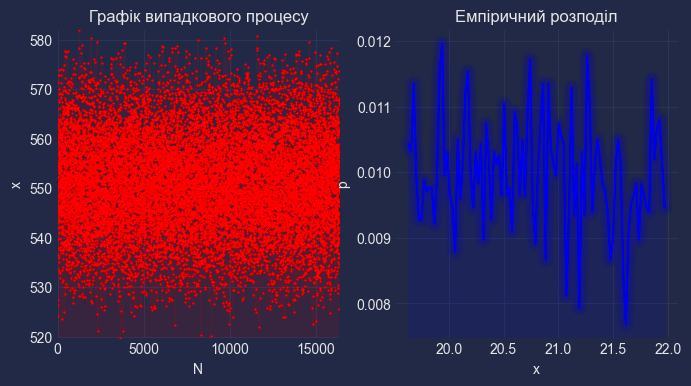

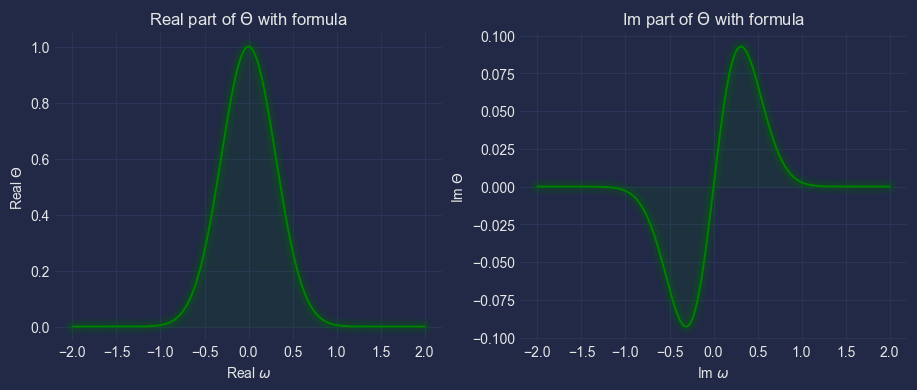

In [72]:
def generate_sections(inter, M):
    sect = []
    a = (inter[1] - inter[0]) / M
    b = inter[0]
    for i in range(M):
        l = [b, b + a]
        sect.append(l)
        b = b + a
    return sect

def calculate_statistics_and_plot(sect, N, M):
    mean = []
    var = []
    superpos = np.zeros(N)

    for j in range(M):
        uni_xs = np.random.rand(N) * (sect[j][1] - sect[j][0]) + sect[j][0]
        _, bins, _ = plt.hist(uni_xs, 100, range=sect[j], color='r', density=True, alpha=0.5)
        p, x = np.histogram(uni_xs, bins, density=True)
        p = p * np.diff(bins)
        x = (bins[:-1] + bins[1:]) / 2  # Adjust x to be the midpoint of bins
        mean.append(np.sum(p * x))
        var.append(np.sum((x - mean[-1]) ** 2 * p))

        superpos += uni_xs * (j + 1)
    plt.title("Histogram graph")
    logging.info('Mean: %s', mean)
    logging.info('Variance: %s', var)

    sig = np.sum(var)
    mean_o = np.sum(mean)

    logging.info('mean_o: %s', mean_o)
    logging.info('emp variance: %s', sig)

    plt.figure(figsize=(8, 4))
    plt.subplot(121)
    plt.subplots_adjust(hspace=0.3)
    plt.plot(range(N), superpos, 'ro', markersize=0.8)
    plt.axis([0, N, np.min(superpos), np.max(superpos)])
    plt.xlabel('N')
    plt.ylabel('x')
    plt.title('Графік випадкового процесу')
    mplcyberpunk.add_glow_effects()

    plt.subplot(122)
    plt.subplots_adjust(hspace=0.3)
    plt.plot(bins[:-1], p, 'b-', alpha=0.9)
    plt.xlabel('x')
    plt.ylabel('p')
    plt.title('Емпіричний розподіл')
    mplcyberpunk.add_glow_effects()

    d = bins[1] - bins[0]
    x = (bins[:-1] + bins[1:]) / 2

    moments = calculate_moments(x, p, d)
    central_moments = calculate_central_moments(x, p, d, moments[0])
    cumulants = calculate_cumulants(central_moments)
    normed_cumulants = calculate_normed_cumulants(cumulants, moments[1])

    logging.info('Moments: %s', moments)
    logging.info('Central Moments: %s', central_moments)
    logging.info('Cumulants: %s', cumulants)
    logging.info('Normed Cumulants: %s', normed_cumulants)

    plot_distribution_and_moments(x, p, d, moments)

def calculate_moments(x, p, d):
    m = np.zeros(4)
    for t in range(1, 5):
        m[t - 1] = np.sum((x**t) * p * d)
    return m

def calculate_central_moments(x, p, d, mean):
    mu = np.zeros(4)
    mu[1] = mean
    for t in range(1, 5):
        mu[t - 1] = np.sum(((x - mean)**t) * p * d)
    return mu

def calculate_cumulants(central_moments):
    sigma = np.sqrt(central_moments[1])
    k = np.array([central_moments[0], central_moments[1], central_moments[2], central_moments[3] - 3 * central_moments[1]**2])
    return k

def calculate_normed_cumulants(cumulants, sigma):
    kn = np.zeros(4)
    for t in range(4):
        kn[t] = cumulants[t] / (sigma**(t + 1))
    return kn

def calculate_distribution(omega, x, p, d):
    theta_r = np.sum(np.cos(omega[:, np.newaxis] * x) * p * d, axis=1)
    theta_im = np.sum(np.sin(omega[:, np.newaxis] * x) * p * d, axis=1)
    return theta_r, theta_im

def real_gaus(x, s, m):
    return np.exp(-0.5 * x**2 * s**2) * np.cos(x * m)

def im_gaus(x, s, m):
    return np.exp(-0.5 * x**2 * s**2) * np.sin(x * m)

def plot_distribution_and_moments(x, p, d, moments):
    plt.figure(figsize=(11, 4))
    plt.subplot(121)
    plt.subplots_adjust(hspace=0.3)
    omega = np.linspace(-2, 2, 500)
    R = real_gaus(omega, np.sqrt(moments[1]), moments[0])
    plt.plot(omega, R, 'g-')
    plt.xlabel('Real $\\omega$')
    plt.ylabel('Real $\\Theta$')
    plt.title('Real part of $\\Theta$ with formula')
    mplcyberpunk.add_glow_effects()
    plt.grid(True)

    plt.subplot(122)
    plt.subplots_adjust(hspace=0.3)
    I = im_gaus(omega, np.sqrt(moments[1]), moments[0])
    plt.plot(omega, I, 'g-')
    plt.xlabel('Im $\\omega$')
    plt.ylabel('Im $\\Theta$')
    plt.title('Im part of $\\Theta$ with formula')
    plt.grid(True)
    mplcyberpunk.add_glow_effects()
    plt.show()

# Set the parameters
inter = [np.pi, 7 * np.pi]
N = 2**14
M = 8

# Generate sections
sections = generate_sections(inter, M)

# Calculate statistics and plot
calculate_statistics_and_plot(sections, N, M)
